In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing required libraries and** **packages**

In [4]:
#import all the required libraries and packages
import numpy as np
import pandas as pd
import pickle
import nltk
import matplotlib.pyplot as plt
from statistics import mode
from nltk import word_tokenize
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input,LSTM,Embedding,Dense,Concatenate,Attention
from sklearn.model_selection import train_test_split
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Analysing the training Dataset**

In [8]:
#read the dataset file
train = pd.read_csv("/content/drive/My Drive/ML Project/train.csv")

#tweet column is input
inp_data = train["tweet"]


#target data is sentiment(s1,s2,s3,s4,s5) ,
#when (w1,w2,w3,w4) and kind(k1,k2,k3...k15)
tar_data = train.iloc[:,4:].values

#get the column name of target
tar_lab = train.iloc[:,4:].columns.tolist()

#value of the target label like
#s1="I can't tell" , s2="Negative" and so on till s5
#w1="current weather", w2=future forecast and so on till w4
#k1="clouds", k2="cold", k3="dry" and so on till k15

tar_lab_val=[
"I can't tell","Negative","Neutral","Positive","Tweet not related to weather condition",
"current (same day) weather","future (forecast)","I can't tell","past weather",
"clouds","cold","dry","hot","humid","hurricane","I can't tell","ice","other","rain",
"snow","storms","sun","tornado","wind"]



Peeking into the dataset

In [9]:
train

,id,tweet,state,location,s1,s2,s3,s4,s5,w1,...,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},oklahoma,Oklahoma,0.0,0.000,1.000,0.000,0.000,0.800,...,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,florida,Miami-Ft. Lauderdale,0.0,0.000,0.000,1.000,0.000,0.196,...,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,idaho,NaN,0.0,0.000,0.000,0.000,1.000,0.000,...,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,minnesota,Minneapolis-St. Paul,0.0,0.000,0.000,1.000,0.000,1.000,...,0.0,0.604,0.0,0.196,0.000,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,rhode island,Purgatory,0.0,0.000,0.000,0.403,0.597,1.000,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77941,120095,"Current Conditions: Fair, 78 FForecast: Sat - ...",florida,"Jacksonville, Florida",0.0,0.000,1.000,0.000,0.000,0.206,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.794,0.0,0.0
77942,120097,WE DOIN SOMETHING DIFFERENT... SINCE THE WEATH...,colorado,"Denver,Colorado",0.0,0.000,0.000,1.000,0.000,1.000,...,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0
77943,120098,OMG #WeatherForecast for tomm 80 degrees & Sun...,pennsylvania,"Philadelphia, United States",0.0,0.000,0.000,1.000,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0
77944,120100,@mention Oh no! We had cold weather early in t...,alabama,Birmingham (Ann and Tusc),0.0,0.385,0.410,0.205,0.000,0.416,...,0.0,0.000,0.0,0.211,0.591,0.0,0.0,0.000,0.0,0.0


In [11]:
#printing first 10 tweets

for i in range(10):
  print(inp_data[i])

Jazz for a Rainy Afternoon:  {link}
RT: @mention: I love rainy days.
Good Morning Chicago! Time to kick the Windy City in the nuts and head back West!
Preach lol! :) RT @mention: #alliwantis this type of weather all the time.. I live for beautiful days like this! #minneapolis
@mention good morning sunshine
Rather be storm chasing.
#WEATHER:  1:54 pm : 61.0F. Feels 60F. 29.98% Humidity. 6.9MPH East Wind.
Father. Son. Holy ghost. Amen... hope I come out alive =) (this is the Hot~ness) Namaste*!~ {link}
Mild Monday best weather day of the week in Oklahoma: {link} #OKWX
With the snow forecast for Tahoe this weekend, maybe the @mention riders need to bust out the 'Cross bikes :) @mention


In [12]:

inp_texts=[]
tar_texts=[]
inp_words=[]
tar_words=[]

contractions= pickle.load(open("/content/drive/My Drive/ML Project/contractions.pkl","rb"))['contractions']


Preprocessing the tweets

In [14]:
#function for cleaning the tweets

def clean(tweet):
  #replace and lower the tweets
  tweet=tweet.replace(":","").lower()
  #get only words that contains alphabets
  words= list(filter(lambda w:(w.isalpha()),tweet.split(" ")))
  #expand the shortened words
  words= [contractions[w] if w in contractions else w for w in words ]
  #return all the words
  return words


Cleaning the input tweets and generating the corresponding target texts

In [15]:
#iterate over input data (cleaning the tweets from the train dataset)
for tweet in inp_data:
  #clean the tweets
  inpt_words= clean(tweet)
  #store the input texts and words
  inp_texts+= [' '.join(inpt_words)]
  inp_words+= inpt_words


#iterate over target data (converting the target data from index values to a text format)
for lab in tar_data:
  #get index of maximum value from sentiment data(s1 to s5)
  #with the help of this index get label value

  senti=tar_lab[np.argmax(lab[:5])]

  #get index of maximum value from when data(w1 to w4)
  #with the help of this index get label value

  when=tar_lab[np.argmax(lab[5:9])+5]

  #get index of values greater than 0.5 and get label value from it

  kind=[tar_lab[ind] for ind,ele in enumerate(lab[9:len(lab)],9) if ele>=0.5]


  #store the target text which is combination of sentiment,when and kind data
  #add sos at start and eos at end of text
  tar_texts+=["sos "+" ".join([senti]+[when]+kind)+" eos"]


Printing the tweets and thier corresponding label values in that target text

In [25]:
# Function to map labels to their corresponding values
def get_label_values(label_string):
    # Split the target text and filter out 'sos' and 'eos'
    labels = [label for label in label_string.split() if label not in ['sos', 'eos']]
    # Map the labels to their corresponding values
    label_values = [(label, tar_lab_val[tar_lab.index(label)]) for label in labels]
    return label_values

# Loop to print the input tweet, target text, and label values

seq = "";

for i in range(5):
    print("Input tweet: ", inp_texts[i])
    print("Target text: ", tar_texts[i])
    label_values = get_label_values(tar_texts[i])
    for label, value in label_values:
        print(f"Label: {label}, Value: {value}")
        seq+="".join("#"+value+" ")


    print("Corresponding Hashtag")
    print(seq)
    print()



Input tweet:  jazz for a rainy afternoon
Target text:  sos s3 w1 k10 eos
Label: s3, Value: Neutral
Label: w1, Value: current (same day) weather
Label: k10, Value: rain
Corresponding Hashtag
#Neutral #current (same day) weather #rain 

Input tweet:  rt i love rainy
Target text:  sos s4 w3 k10 eos
Label: s4, Value: Positive
Label: w3, Value: I can't tell
Label: k10, Value: rain
Corresponding Hashtag
#Neutral #current (same day) weather #rain #Positive #I can't tell #rain 

Input tweet:  good morning time to kick the windy city in the nuts and head back
Target text:  sos s5 w3 k7 eos
Label: s5, Value: Tweet not related to weather condition
Label: w3, Value: I can't tell
Label: k7, Value: I can't tell
Corresponding Hashtag
#Neutral #current (same day) weather #rain #Positive #I can't tell #rain #Tweet not related to weather condition #I can't tell #I can't tell 

Input tweet:  preach rt this type of weather all the i live for beautiful days like
Target text:  sos s4 w1 k7 eos
Label: s4, Va

In [28]:

#only store unique words from the input and target word lists
inp_words = sorted(list(set(inp_words)))
num_inp_words = len(inp_words)
num_tar_words = len(tar_lab)+2


#get the length of the input and the target texts which appears most frequently
max_inp_len = mode([len(i) for i in inp_texts])
max_tar_len = mode([len(i) for i in tar_texts])

print("Number of input words : ",num_inp_words)
print("Number of target words : ",num_tar_words)
print("Maximum input length : ",max_inp_len)
print("Maximum target length : ",max_tar_len)



Number of input words :  27940
Number of target words :  26
Maximum input length :  14
Maximum target length :  16


**Creating Training and Validation set**

In [27]:
#split the input and target text into 90:10 ratio or testing size of 10%=0.1.
x_train,x_test,y_train,y_test=train_test_split(inp_texts,tar_texts,test_size=0.1,random_state=42)

In [29]:

# Using all of the words from training input and output to train the tokenizer.
# Initialize the tokenizers for input and target data
inp_tokenizer = Tokenizer()
tar_tokenizer = Tokenizer()

# Fitting the tokenizers on the training data
# it step creates the word index based on the frequency of each word in the training data
inp_tokenizer.fit_on_texts(x_train)
tar_tokenizer.fit_on_texts(y_train)

# Converting text to an integer sequence where each integer represents the word index.
# Converting the input texts to sequences of integers
x_train = inp_tokenizer.texts_to_sequences(x_train)
# Convert the target texts to sequences of integers
y_train = tar_tokenizer.texts_to_sequences(y_train)

# If the length is less than the maximum length, pad the array with 0s.
# maximum lengths for input and target sequences
max_inp_len = max(len(seq) for seq in x_train)
max_tar_len = max(len(seq) for seq in y_train)

# Pad the sequences with 0s to ensure they all have the same length
enc_inp_data = pad_sequences(x_train, maxlen=max_inp_len, padding='post', dtype="float32")
dec_data = pad_sequences(y_train, maxlen=max_tar_len, padding='post', dtype="float32")

# The last word, i.e., 'eos', will not be included in the decoder input data.
# Preparing decoder input data by excluding the last word of each sequence
# This is because the decoder input needs to predict the next word in the sequence
dec_inp_data = dec_data[:, :-1]

# Decoder target data will be one time step ahead as it will not include the first initial word, i.e., 'sos'.
# Preparing decoder target data by excluding the first word of each sequence
# The target data needs to predict the sequence starting from the second word to the end
dec_tar_data = dec_data.reshape(len(dec_data), max_tar_len, 1)[:, 1:]


In [35]:
# Print some sequences
print("First 5 input sequences:", x_train[:5])
print("First 5 target sequences:", y_train[:5])

# Print some padded sequences
print("First 2 padded input sequences:\n", enc_inp_data[:2])
print("First 2 padded target sequences:\n", dec_data[:2])

First 5 input sequences: [[357, 296, 36, 189, 1397, 56, 6, 19, 270, 35, 3, 349, 137, 3, 1, 289, 9], [13, 31, 224, 2, 227, 693, 141, 80, 9], [31, 615, 39, 3, 363, 74, 3, 18, 4, 41], [7, 102, 53, 12890, 3, 898, 15, 6360], [41, 296, 2507, 185, 460, 1, 2, 30, 190, 6, 7, 110, 211, 25, 3460, 4, 41]]
First 5 target sequences: [[1, 7, 3, 11, 2], [1, 4, 15, 23, 2], [1, 7, 3, 10, 2], [1, 6, 3, 13, 2], [1, 7, 3, 5, 2]]
First 2 padded input sequences:
 [[3.570e+02 2.960e+02 3.600e+01 1.890e+02 1.397e+03 5.600e+01 6.000e+00
  1.900e+01 2.700e+02 3.500e+01 3.000e+00 3.490e+02 1.370e+02 3.000e+00
  1.000e+00 2.890e+02 9.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.300e+01 3.100e+01 2.240e+02 2.000e+00 2.270e+02 6.930e+02 1.410e+02
  8.000e+01 9.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e

In [33]:
# shapes of the padded sequences
print("Shape of encoder input data:", enc_inp_data.shape)
print("Shape of decoder data:", dec_data.shape)
print("Shape of decoder input data:", dec_inp_data.shape)
print("Shape of decoder target data:", dec_tar_data.shape)

Shape of encoder input data: (70151, 32)
Shape of decoder data: (70151, 10)
Shape of decoder input data: (70151, 9)
Shape of decoder target data: (70151, 9, 1)


**Creating the Model for training**

In [36]:

from keras import backend as K
K.clear_session()
latent_dim = 500

#create input object with the shape equal to the maximum number of input words
enc_inputs = Input(shape=(max_inp_len,))
enc_embedding = Embedding(num_inp_words+1, latent_dim)(enc_inputs)


In [37]:
# 1st LSTM Layer
# This layer keeps only the output sequences
enc_lstm1 = LSTM(latent_dim, return_state=True, return_sequences=True)
# Pass the input embeddings through the first LSTM layer
enc_outputs1, *enc_states1 = enc_lstm1(enc_embedding)

# 2nd LSTM Layer
# This layer also keeps only the output sequences
enc_lstm2 = LSTM(latent_dim, return_state=True, return_sequences=True)
# Pass the outputs of the first LSTM layer to the second LSTM layer
enc_outputs2, *enc_states2 = enc_lstm2(enc_outputs1)

# 3rd LSTM Layer
# This layer keeps both the output sequences and its states (hidden state and cell state)
enc_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True)

# Pass the outputs of the second LSTM layer to the third LSTM layer
enc_outputs3, state_h3, state_c3 = enc_lstm3(enc_outputs2)

In [39]:
# Encoder states
# The encoder's final hidden state and cell state will be used to initialize the decoder
enc_states = [state_h3, state_c3]

# Decoder
# Defining the input layer for the decoder
# The decoder input shape is (None,) indicating that the input can be of variable length
dec_inputs = Input(shape=(None,))

# Define the embedding layer for the decoder
# The embedding layer converts integer sequences into dense vectors of fixed size (latent_dim)
# num_tar_words+1 accounts for all the words in the target vocabulary plus one for padding
dec_emb_layer = Embedding(num_tar_words + 1, latent_dim)

# Apply the embedding layer to the decoder inputs
dec_embedding = dec_emb_layer(dec_inputs)

# Initialize the LSTM layer of the decoder with the encoder's output states
# The decoder LSTM layer will be initialized with the encoder's final states
# return_sequences = True ensures the decoder returns the full sequence of outputs
# return_state = True ensures the decoder returns its final states
dec_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)

# Pass the embedded decoder inputs through the decoder LSTM
# initial_state=enc_states initializes the LSTM with the encoder's final states
dec_outputs, *dec_states = dec_lstm(dec_embedding, initial_state=enc_states)


In [40]:
# Attention Layer
# The attention layer takes the decoder outputs and encoder outputs and computes the context vector
attention = Attention()

# Apply the attention layer to the decoder outputs and encoder outputs
# dec_outputs: The outputs from the decoder LSTM
# enc_outputs3: The outputs from the encoder's final LSTM layer
attn_out = attention([dec_outputs, enc_outputs3])

# Merge the attention output with the decoder outputs
# Concatenate the attention output with the decoder outputs along the last axis
merge = Concatenate(axis=-1, name='concat_layer1')([dec_outputs, attn_out])

# Fully Connected Dense Layer for the Output
# The dense layer outputs the final predictions for the target sequence
# num_tar_words+1: The number of words in the target vocabulary plus one for padding
dec_dense = Dense(num_tar_words + 1, activation='softmax')

# Apply the dense layer to the merged output
# dec_outputs now contains the final output predictions for each time step in the sequence
dec_outputs = dec_dense(merge)


In [41]:

# Model Class and Model Summary
# Create the model instance by specifying the encoder and decoder inputs and the final decoder output
model = Model([enc_inputs, dec_inputs], dec_outputs)

# Print the model summary to visualize the architecture
model.summary()

# Save the model architecture to a file for visualization
plot_model(model, to_file='/content/drive/MyDrive/ML Project/model_plot.png', show_shapes=True, show_layer_names=True)

# Compiling the Model
# Compile the model using the Adam optimizer and sparse categorical cross-entropy loss
# Metrics include accuracy to monitor during training
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the Model
# Train the model with the input and target data from the encoder and decoder
# batch_size specifies the number of samples per gradient update
# epochs specifies the number of iterations over the entire training dataset
history = model.fit([enc_inp_data, dec_inp_data], dec_tar_data, batch_size=500, epochs=10)

#Save the trained model with the name as “s2s”
model_save_path = '/content/drive/MyDrive/ML Project/s2s_model.h5'
model.save(model_save_path)



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 32, 500)              1397050   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 lstm (LSTM)                 [(None, 32, 500),            2002000   ['embedding[0][0]']           
                              (None, 500),                                                        
                              (None, 500)]                                                    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:

#encoder inference
latent_dim=500

#load the model
model = models.load_model(model_save_path)


In [43]:

# Encoder Model Construction
# Extract outputs and states from the 6th layer of the existing model
enc_outputs, state_h_enc, state_c_enc = model.layers[6].output
enc_states = [state_h_enc, state_c_enc]

# Define the encoder model with input and output states from the layer
enc_model = Model(model.input[0], [enc_outputs] + enc_states)

# Decoder Inference Model Construction
# Define input objects for hidden state, cell state, and encoder hidden state input for decoder
dec_state_input_h = Input(shape=(latent_dim,))
dec_state_input_c = Input(shape=(latent_dim,))
dec_hidden_state_input = Input(shape=(max_inp_len, latent_dim))

# Get necessary layers from the existing model for decoder construction
dec_inputs = model.input[1]
dec_emb_layer = model.layers[5]  # Embedding layer
dec_lstm = model.layers[7]  # LSTM layer
dec_embedding = dec_emb_layer(dec_inputs)

# Initialize LSTM layer with decoder's hidden and cell state
dec_outputs2, state_h2, state_c2 = dec_lstm(dec_embedding, initial_state=[dec_state_input_h, dec_state_input_c])

# Attention Layer
attention = model.layers[8]
attn_out1 = attention([dec_outputs2, dec_hidden_state_input])

# Merge attention output with decoder outputs
merge2 = Concatenate(axis=-1)([dec_outputs2, attn_out1])

# Dense layer for decoder output
dec_dense = model.layers[10]
dec_outputs2 = dec_dense(merge2)

# Define the decoder model with input and output states
dec_model = Model(
    [dec_inputs] + [dec_hidden_state_input, dec_state_input_h, dec_state_input_c],
    [dec_outputs2] + [state_h2, state_c2]
)


In [44]:

# Create a dictionary with all indexes as keys and respective target labels as values
reverse_tar_word_index = tar_tokenizer.index_word
reverse_inp_word_index = inp_tokenizer.index_word
tar_word_index = tar_tokenizer.word_index

# Set the padding token for the target dictionary
reverse_tar_word_index[0] = ' '

In [45]:
def decode_sequence(inp_seq):
    # Get the encoder outputs and states (hidden and cell) by passing the input sequence
    enc_out, enc_h, enc_c = enc_model.predict(inp_seq)

    # Target sequence with starting initial word as 'sos'
    tar_seq = np.zeros((1, 1))
    tar_seq[0, 0] = tar_word_index['sos']

    # Initialize variables for stopping condition and decoded sentence
    stop_condition = False
    decoded_sentence = ""

    while not stop_condition:
        # Predict output words, hidden state, and cell state using the decoder model
        output_words, dec_h, dec_c = dec_model.predict([tar_seq] + [enc_out, enc_h, enc_c])

        # Get the word from the dictionary using the index
        word_index = np.argmax(output_words[0, -1, :])
        text_word = reverse_tar_word_index[word_index]
        decoded_sentence += text_word + " "

        # Stop when we either hit max length or reach the terminal word 'eos'
        if text_word == "eos" or len(decoded_sentence) > max_tar_len:
            stop_condition = True

        # Update target sequence with the current word index
        tar_seq = np.zeros((1, 1))
        tar_seq[0, 0] = word_index
        enc_h, enc_c = dec_h, dec_c

    # Return the decoded sentence string
    return decoded_sentence



In [46]:
# Dictionary with key as label and value as target label value
lab_val = dict((i, v) for i, v in zip(tar_lab, tar_lab_val))

# Iterate over test samples, printing predictions and actual hashtags
for i in range(0, 20, 3):
    # Tokenize x_test and convert it into integer sequence
    inp_x = inp_tokenizer.texts_to_sequences([x_test[i]])
    # Pad array with zeros
    inp_x = pad_sequences(inp_x, maxlen=max_inp_len, padding='post')
    # Reshape the input x_test
    tag = decode_sequence(inp_x.reshape(1, max_inp_len)).replace('eos', '')

    # Print results
    print("Tweet:", x_test[i])
    print("Predicted Hashtag:", " ".join(["#" + lab_val[i] for i in word_tokenize(tag)]))
    print("Actual Hashtag:", " ".join(["#" + lab_val[i] for i in y_test[i][4:-4].split(" ")]))
    print("\n")



1/1 [==============================] - 0s 34ms/step
Tweet: its so cold out where did spring
Predicted Hashtag: #Negative #current (same day) weather #cold
Actual Hashtag: #Negative #current (same day) weather #cold


1/1 [==============================] - 0s 35ms/step
Tweet: finally made it out of for breakfast and then see how the weather looks a little
Predicted Hashtag: #Positive #current (same day) weather #I can't tell
Actual Hashtag: #Neutral #current (same day) weather #I can't tell


1/1 [==============================] - 0s 19ms/step
Tweet: not in in high pitch black and
Predicted Hashtag: #Neutral #current (same day) weather
Actual Hashtag: #Negative #current (same day) weather #wind


1/1 [==============================] - 0s 28ms/step
Tweet: gorgeous weather in
Predicted Hashtag: #Positive #current (same day) weather #I can't tell
Actual Hashtag: #Positive #current (same day) weather #I can't tell


1/1 [==============================] - 0s 19ms/step
Tweet: the amory humane

**Result Analysis**

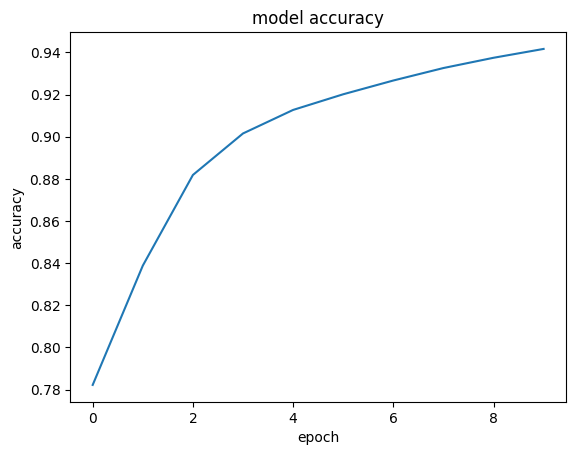

In [47]:

# Plotting model accuracy history
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

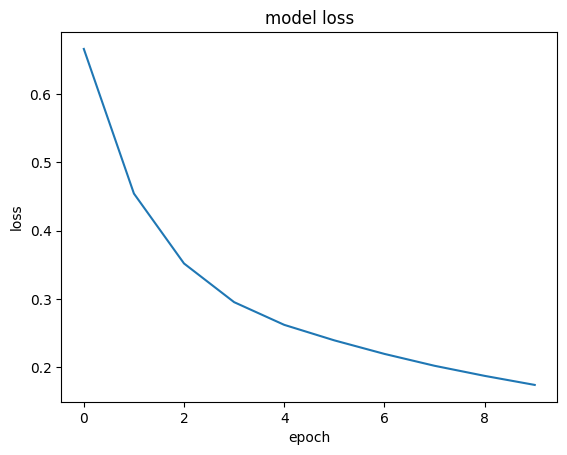

In [48]:
# Plotting model loss history
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()